### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Answer:

Independent variable is the congruency of the colour and text.

Dependent variable is duration (time) to recognise the colours or the texts.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Answer: 

Null (H0): A difference between the average time to name the ink colors from the INCONGRUENT words and the average time to name the ink colors from the CONGRUENT words is LESS than or EQUAL to zero.

Alternative (H1) : A difference between the average time to name to ink colors from the INCONGRUENT words and the the average time to name the ink colors from the CONGRUENT words is GREATER than zero.

$$ H_0: \mu_{incongruent} - \mu_{congruent} <= 0 $$
$$ H_1: \mu_{incongruent} - \mu_{congruent} > 0  $$

$\mu_{incongruent}$ is the average time to name the ink colors from the INCONGRUENT words

$\mu_{congruent}$ is the average time to name the ink colors from the CONGRUENT words

Before start testing, we will clean up the data first by inspecting some descriptive statistics of the dataset to find any outliers and remove them.

Then, since the dataset that we will be using for this hypothesis testing is quite small (the sample size is less than 25), we will use the bootstrapping technique to sample data with replacement and find a difference between the mean values of the INCONGRUENT and CONGRUENT data using the bootstrapped samples and repeat this step many times to create a large enough sample size (Law of Large Numbers - as our sample size increases, the sample mean gets closer to the population mean) to create a sampling distribution of a difference in the mean values of the Incongruent and Congruent data (Central Limit Theorem - with a large enough sample size the sampling distribution of the mean will be normally distributed).

We will use this sampling distribution to find a confident interval, and uses a standard deviation value of this sampling distribution to find a p-value. Then, we will use these metrics to draw conclusions for this hypothesis testing (reject or fail to reject the null hypothesis). 

Source: Lesson 10 - Sampling Distribution and the Central Limit Theorem (Data Analyst Nanodegree Term 1)

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [13]:
# Perform the analysis here
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [14]:
# Find Median
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

Answer:

Measure of central tendency:

Average time to name ink colors from the "congruent" words is 14.051125 seconds
Average time to name ink colors from the "incongruent" words is 22.015917 seconds

Average time to name ink colors from the "congruent" words is 14.3565 seconds
Average time to name ink colors from the "incongruent" words is 21.0175 seconds
            
Measure of variability: 

Standard deviation of time to name ink colors from the "congruent" words is 3.559358 seconds
Standard deviation of time to name ink colors from the "incongruent" words is 4.797057 seconds

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

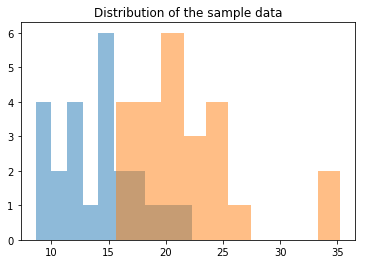

In [15]:
# Build the visualizations here

# Distribution of the sample data
plt.hist(df['Congruent'], alpha = 0.5);
plt.hist(df['Incongruent'], alpha = 0.5); 
plt.title('Distribution of the sample data');

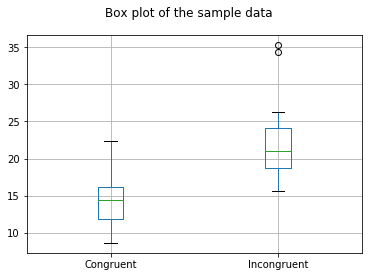

In [16]:
# Box plot of the sample data
df.boxplot();
plt.suptitle('Box plot of the sample data');

Answer:

The first plot shows a distribution of the sample data and we can see that the shape of the distribution of the Congruent and Incongruent data adhere to the normal distribution and, more specifically, the plot of the Incongruent data shows outliers in the sample data.

The second plot shows a box of the sample data and it confirms what we see in the first plot where outliers are identified in the Incongruent data.


(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

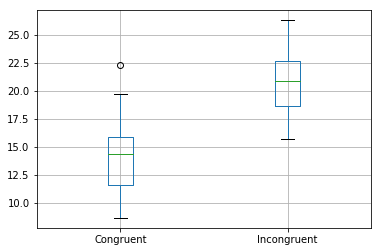

In [17]:
# Perform the statistical test here

# Remove outliers by removing samples where the Incongruent data is greater than 30
df_new = df.query('Incongruent < 30')

# Inspect the new box plot
df_new.boxplot();

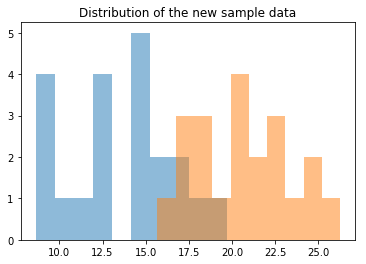

In [18]:
# Distribution of the new sample data
plt.hist(df_final['Congruent'], alpha = 0.5);
plt.hist(df_final['Incongruent'], alpha = 0.5); 
plt.title('Distribution of the new sample data');

,Congruent,Incongruent
count,21.000000,21.000000
mean,13.539524,20.681667
std,3.141193,2.825932
min,8.630000,15.687000
25%,11.344000,18.644000
50%,14.233000,20.762000
75%,15.298000,22.158000
max,19.710000,26.282000


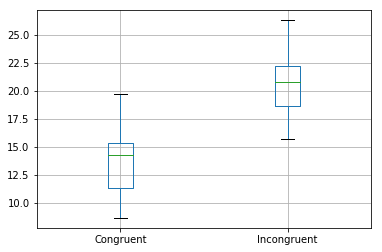

In [19]:
# Looks like we now have an outlier in the Congruent data
# Remove the outliers and inspect the box plot again
df_final = df_new.query('Congruent < 21')
df_final.boxplot();

df_final.describe()

In [20]:
lenData = df_final.shape[0];

diffs = [];

for _ in range(10000):
    bootsample = df_final.sample(lenData, replace=True)
    mean_incongruent = bootsample['Incongruent'].mean()
    mean_congruent = bootsample['Congruent'].mean()
    
    diffs.append(mean_incongruent - mean_congruent)
    


99% Confidence interval: (5.3062552380952397, 8.9049716666666558)


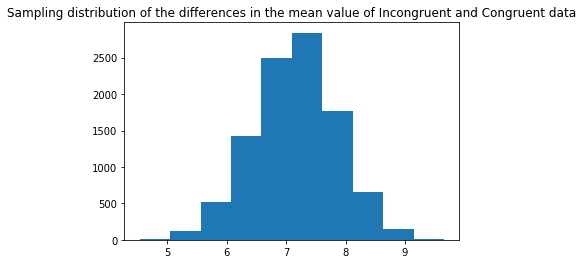

In [21]:
import numpy as np

conf_interval = np.percentile(diffs, 0.5), np.percentile(diffs, 99.5)
print('99% Confidence interval: {}'.format(conf_interval))

plt.hist(diffs);
plt.title('Sampling distribution of the differences in the mean value of Incongruent and Congruent data');


In [22]:
# Generage null values to generate the normal distribution with the std value of diffs
null_vals = np.random.normal(0, np.std(diffs), 10000);

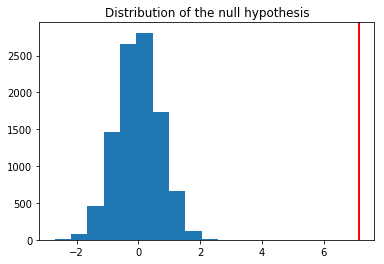

In [23]:
# Find a difference between mean_Incongruent and mean_Congruent
new_diff_sample_mean = df_final['Incongruent'].mean() - df_final['Congruent'].mean()

plt.hist(null_vals);
plt.title('Distribution of the null hypothesis');

plt.axvline(x=new_diff_sample_mean, color='r', linewidth=2);

In [24]:
# Find the p-value 
# H0: mu_Incongruent - mu_Congruent <= 0

(new_diff_sample_mean <= null_vals).mean()

0.0

Answer:

$$ H_0: \mu_{incongruent} - \mu_{congruent} <= 0 $$
$$ H_1: \mu_{incongruent} - \mu_{congruent} > 0  $$



Given that the confidence interval is 99%, 

since the confidence interval of a difference between the average time to name the ink colors from the INCONGRUENT words and the average time to name the ink colors from the CONGRUENT words is (5.3071, 8.8825) and the p-value is 0,

we have evidence of the average time to name the ink colors from the INCONGRUENT words is GREATER than the average time to name the ink colors from the CONGRUENT words.
(Null hypothesis is rejected)

This result matches my expectation that the time it takes to name the ink colors from the INCONGRUENT words is higher.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Answer:

It makes sense that the time it takes to name the ink colors from the INCONGRUENT words is higher since we need to do additional post-processing to name the ink color that is not matched the color we see.

A similar experiment that would result in a similar effect could be to ask the control group to raise a flag on a direction that they hear, e.g. Left->Left, Right->Right, Up->Up, Down->Down, and the experimental group to raise a flag on an opposite direction that they hear, e.g. Left->Right, Right->Left, Up->Down, Down->Up.